In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarPrice_assignment.csv')

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
target_fields = ['price']
identifier_fields = ['car_ID','CarName']
categorical_features = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
numerical_features = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

In [7]:
for c in categorical_features:
    print(f"{c} : {df[c].unique()}")

symboling : [ 3  1  2  0 -1 -2]
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


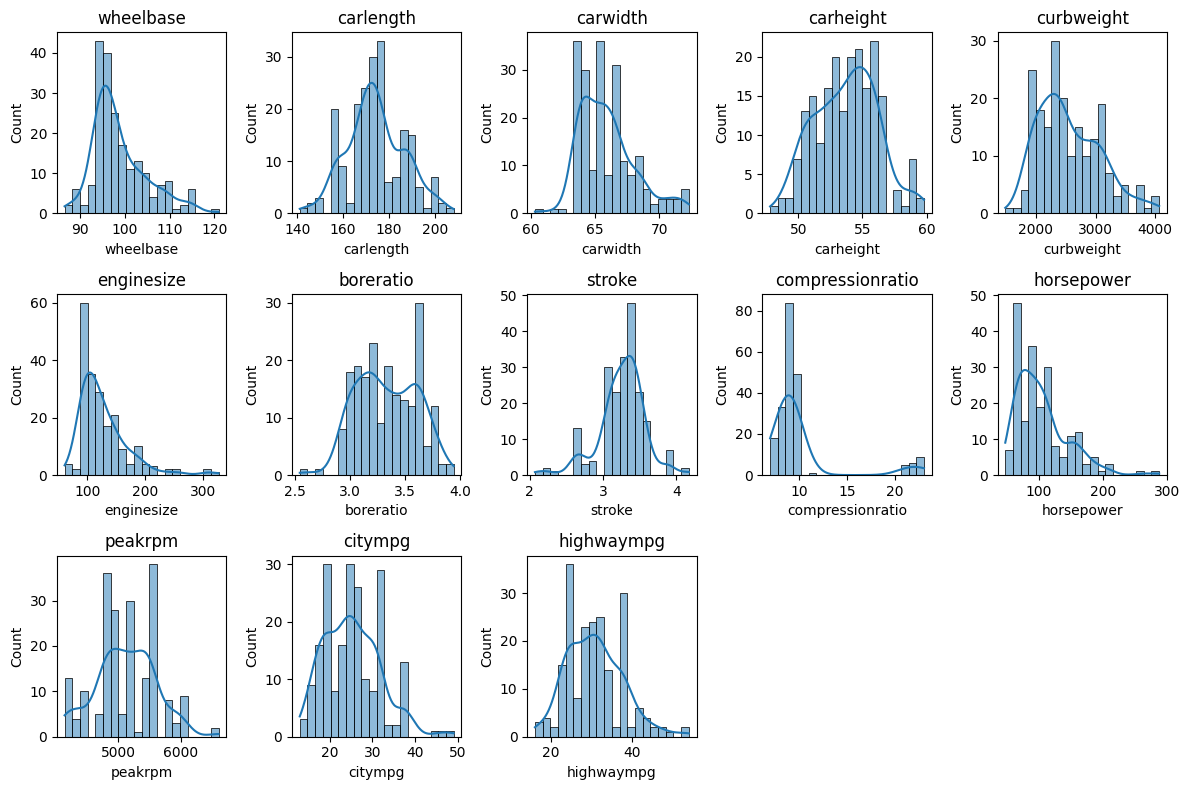

In [8]:
plt.figure(figsize=(12,8))
for f in numerical_features:
    plt.subplot(3,5,numerical_features.index(f) + 1)
    sns.histplot(data=df[f], bins=20, kde=True)
    plt.title(f)
plt.tight_layout()
plt.show()

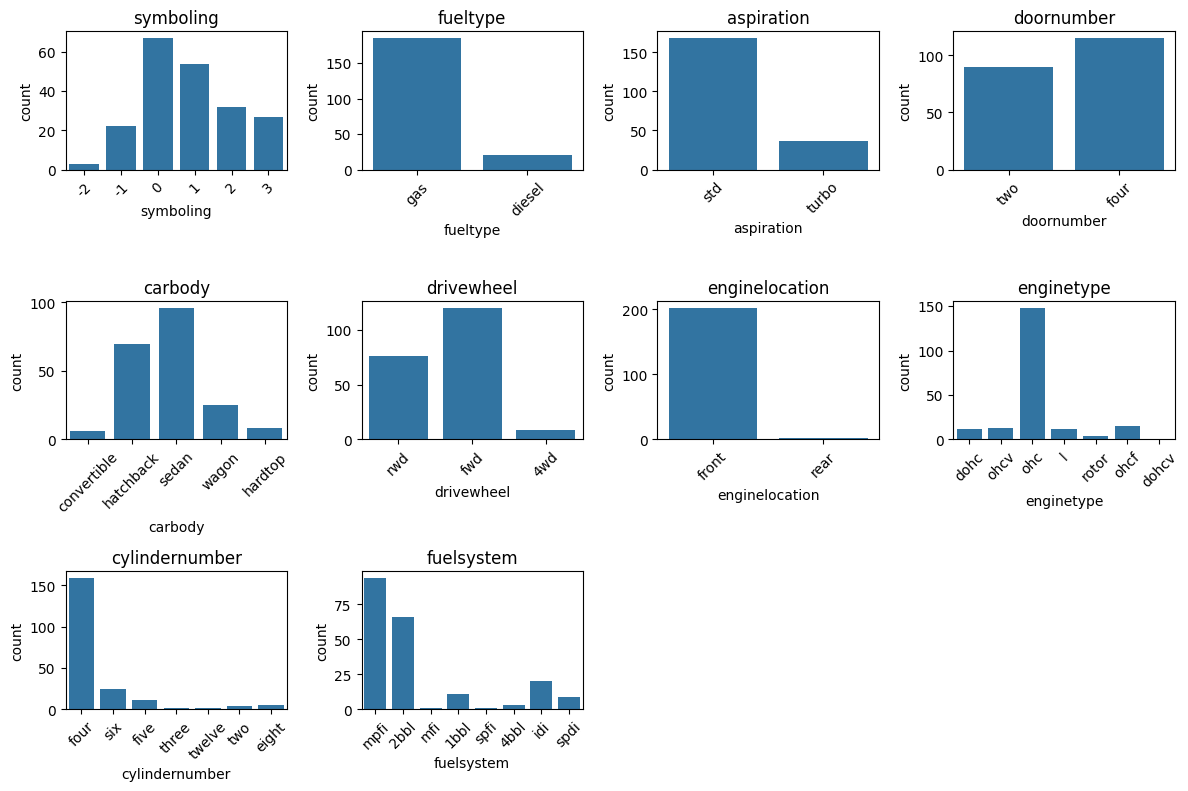

In [9]:
plt.figure(figsize=(12,10))
for f in categorical_features:
    plt.subplot(4,4,categorical_features.index(f) + 1)
    sns.countplot(x=f, data=df)
    plt.title(f)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

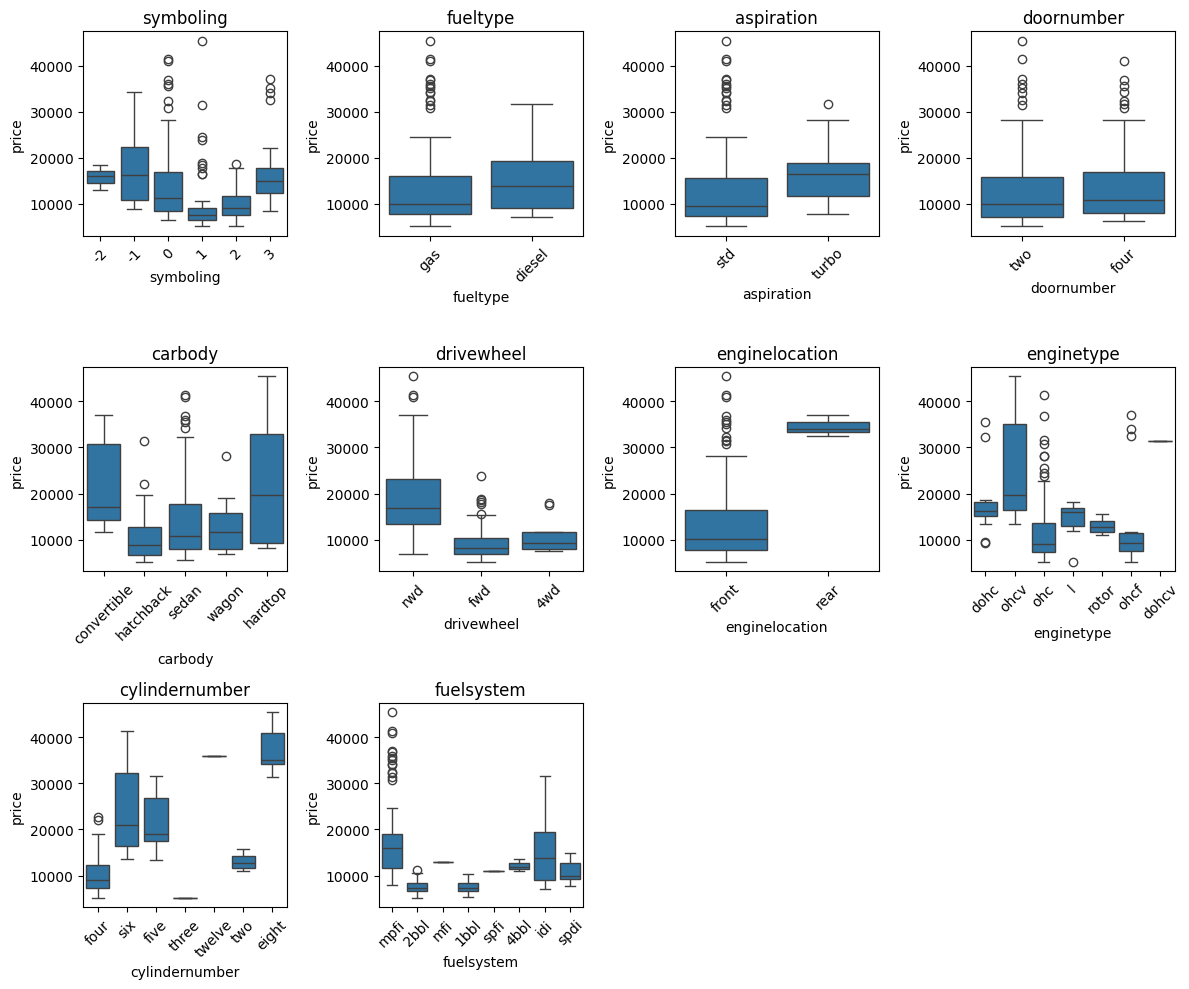

In [10]:
plt.figure(figsize=(12,10))
for f in categorical_features:
    plt.subplot(3,4,categorical_features.index(f) + 1)
    sns.boxplot(y=target_fields[0], x=f, data=df)
    plt.title(f)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

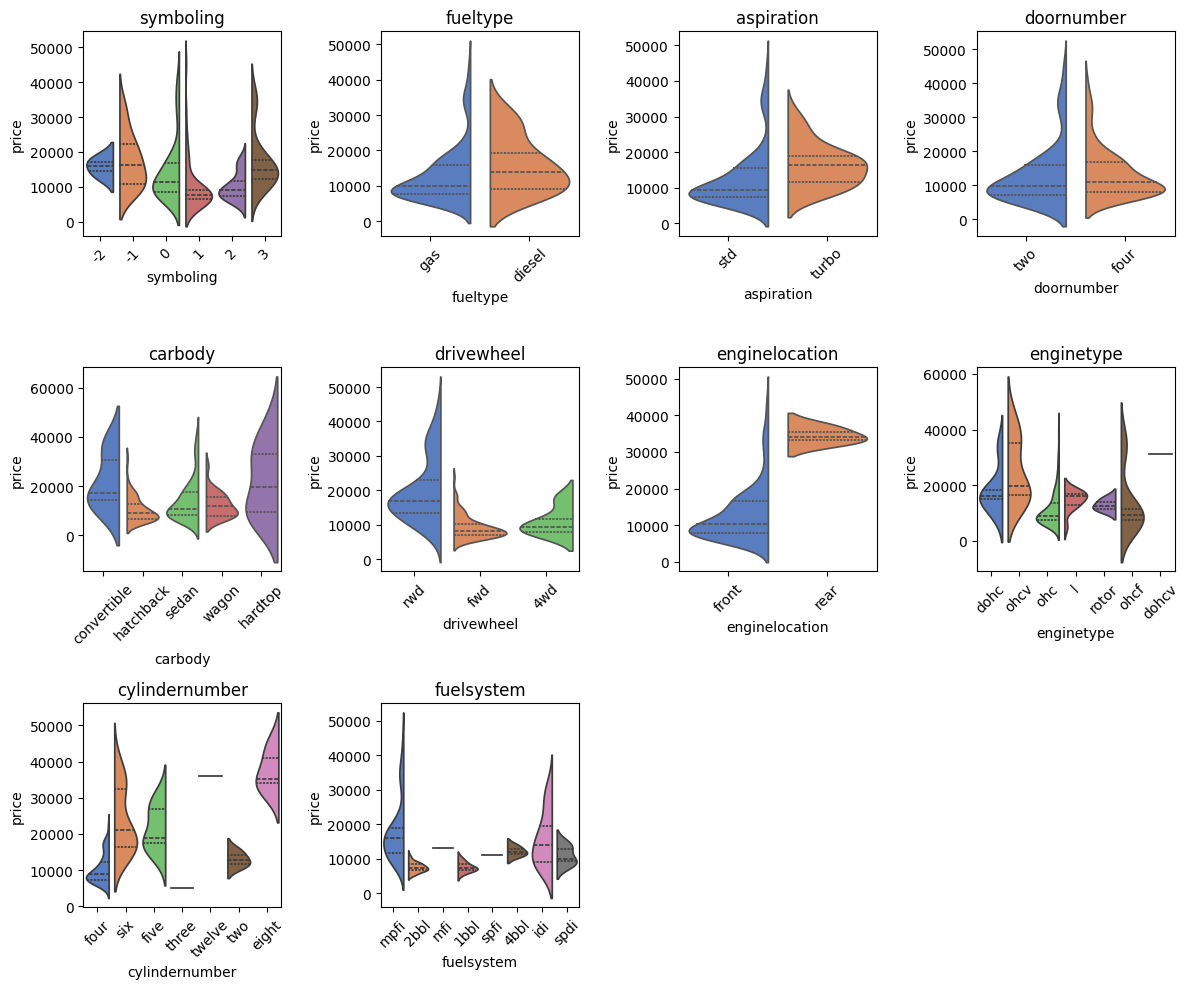

In [11]:
plt.figure(figsize=(12,10))
for f in categorical_features:
    plt.subplot(3,4,categorical_features.index(f) + 1)
    sns.violinplot(x=f, y=target_fields[0], data=df, split=True, inner="quartile", palette="muted")
    plt.title(f)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

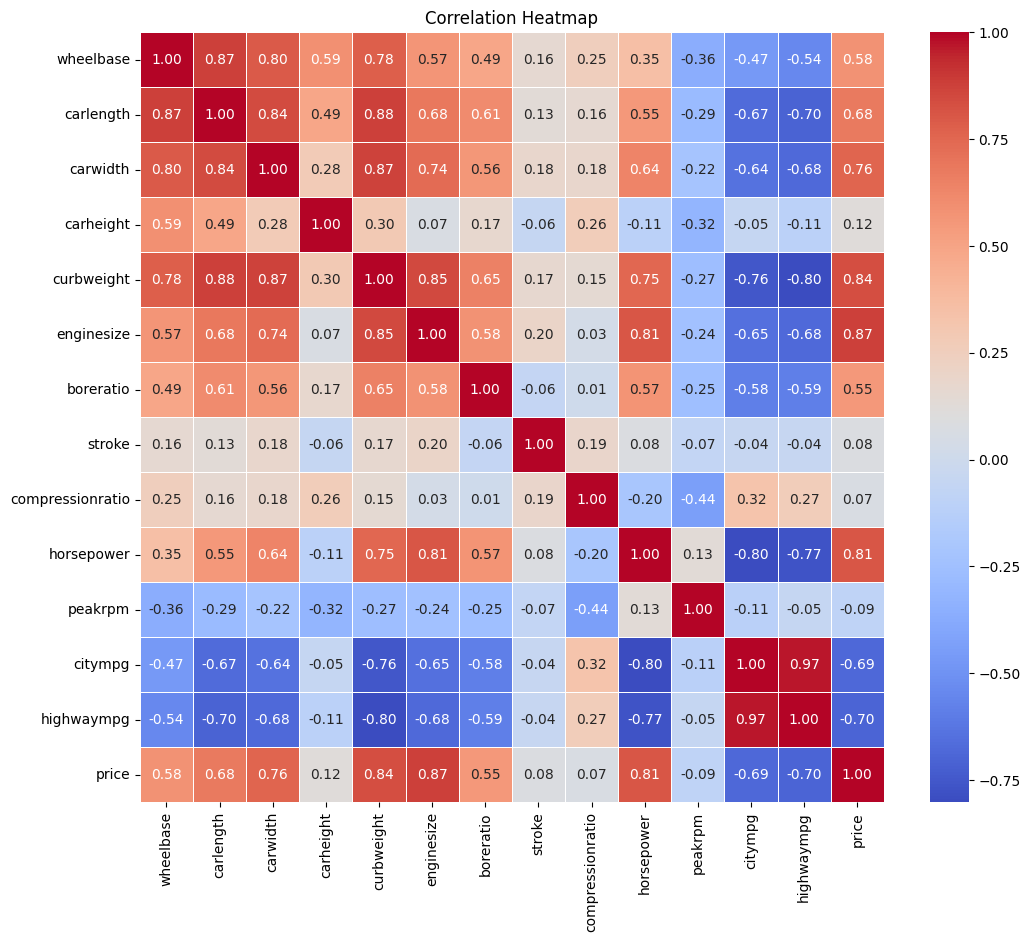

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features + target_fields].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

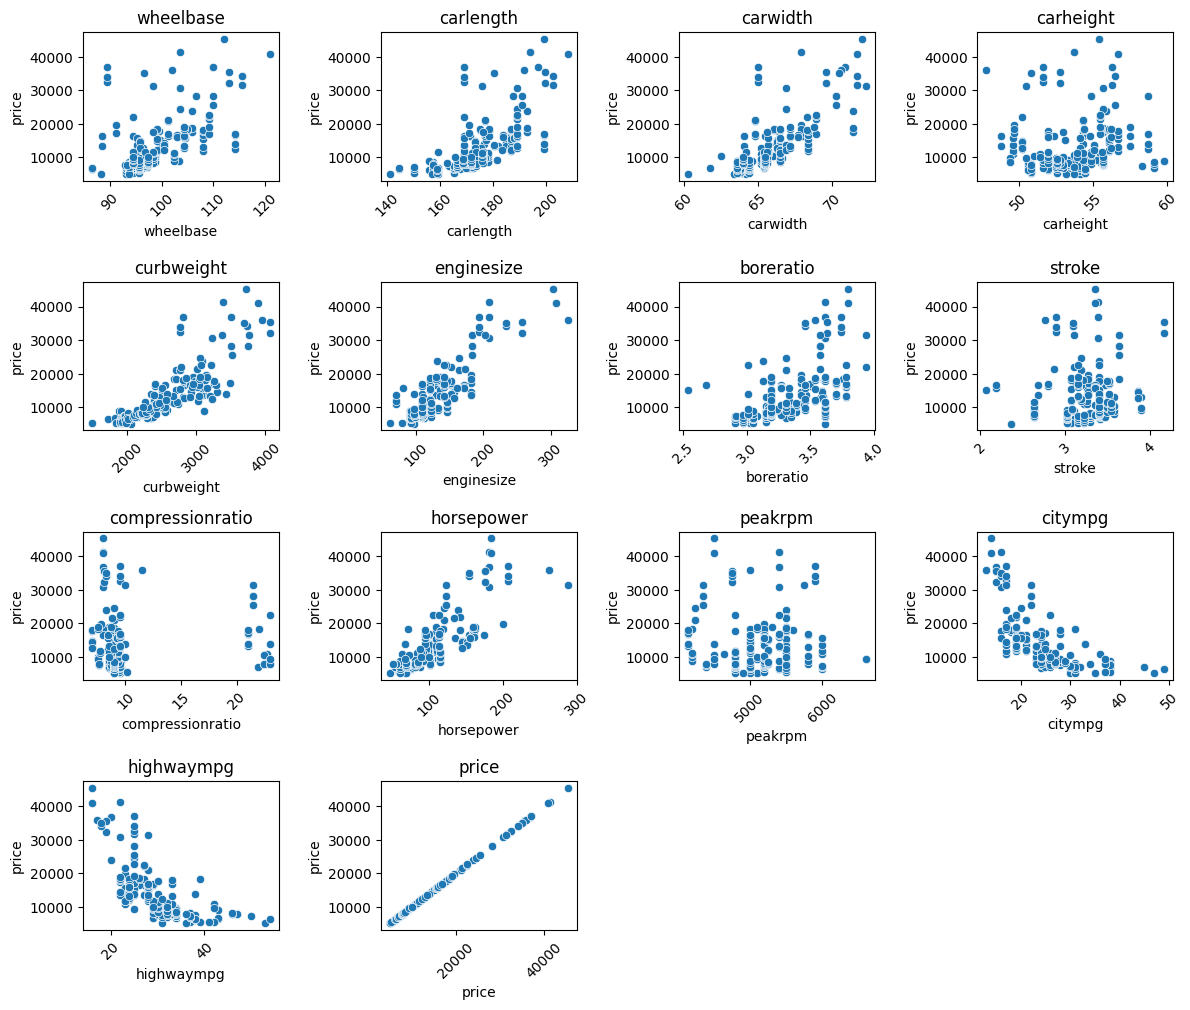

In [13]:
plt.figure(figsize=(12,12))
nfs = numerical_features + target_fields
for f in nfs:
    plt.subplot(5,4,nfs.index(f) + 1)
    sns.scatterplot(x=f, y=target_fields[0], data=df)
    plt.title(f)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

label_encoder = LabelEncoder()
encoded_features = []
for f in categorical_features:
    ef = f + '_encoded'
    df[ef] = label_encoder.fit_transform(df[f])
    encoded_features.append(ef)

In [15]:
# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
numerical_sq_features = []
for column in numerical_features:
    df[f'{column}_squared'] = df[column] ** 2
    numerical_sq_features.append(f'{column}_squared')
df['log_enginesize'] = np.log(df['enginesize'] + 1)
df['log_enginesize'] = df['log_enginesize'].fillna(0)

engineered_model_features = numerical_sq_features + ['power_to_weight_ratio','log_enginesize']
numerical_model_features = numerical_features + engineered_model_features
numerical_fit_features = numerical_features

scaler = StandardScaler()
df[numerical_fit_features] = scaler.fit_transform(df[numerical_fit_features])

In [16]:
df[numerical_model_features].isna().sum()

wheelbase                   0
carlength                   0
carwidth                    0
carheight                   0
curbweight                  0
enginesize                  0
boreratio                   0
stroke                      0
compressionratio            0
horsepower                  0
peakrpm                     0
citympg                     0
highwaympg                  0
wheelbase_squared           0
carlength_squared           0
carwidth_squared            0
carheight_squared           0
curbweight_squared          0
enginesize_squared          0
boreratio_squared           0
stroke_squared              0
compressionratio_squared    0
horsepower_squared          0
peakrpm_squared             0
citympg_squared             0
highwaympg_squared          0
power_to_weight_ratio       0
log_enginesize              0
dtype: int64

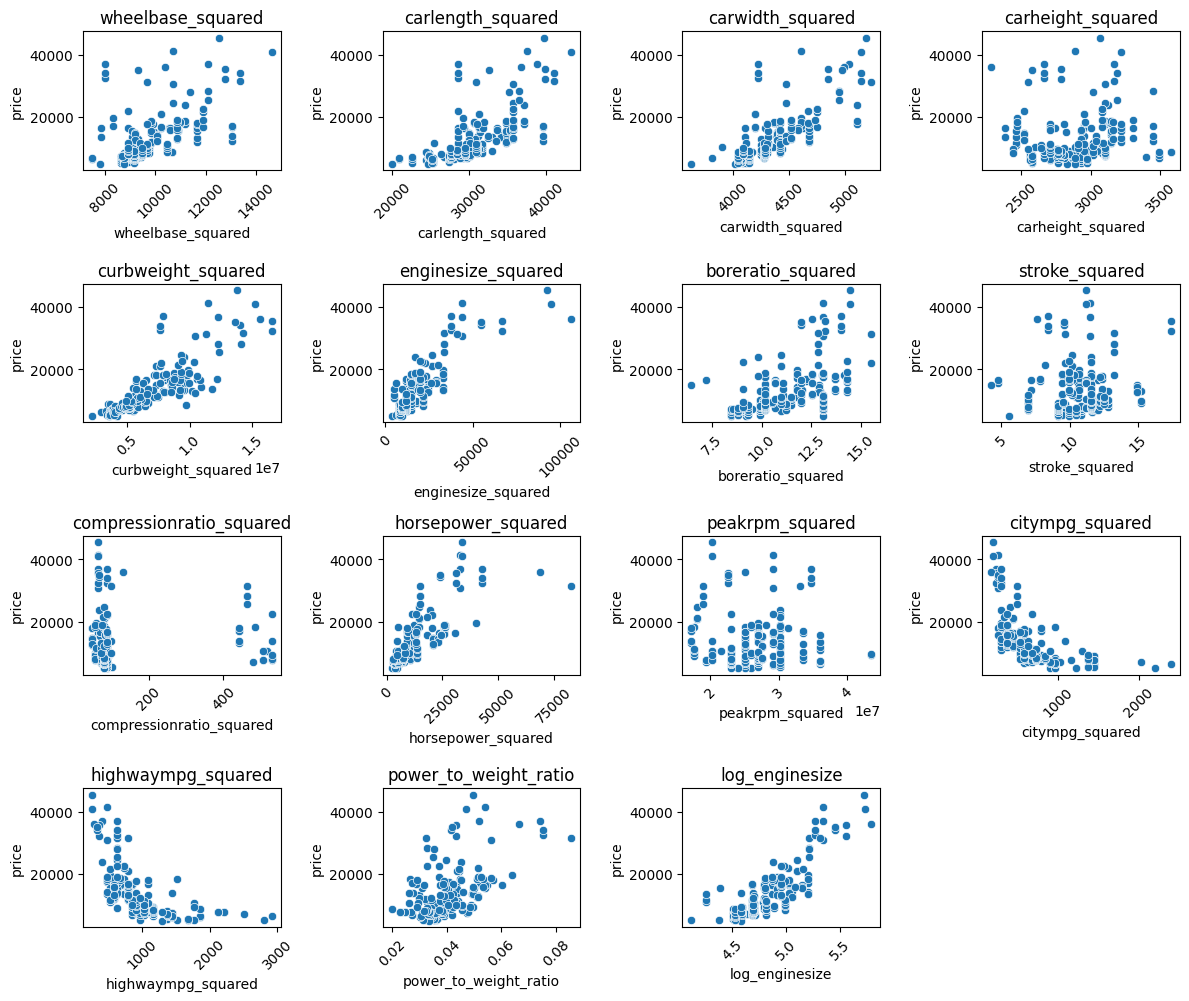

In [17]:
#VISUALIZE ENGINEERED FEATURES
plt.figure(figsize=(12,12))
for f in engineered_model_features:
    plt.subplot(5,4,engineered_model_features.index(f) + 1)
    sns.scatterplot(x=f, y=target_fields[0], data=df)
    plt.title(f)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Splitting the dataset
X = df[encoded_features + numerical_model_features]
y = df[target_fields[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [19]:
model.score(X_train, y_train)

0.9365086688166965

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8397466764667298
Mean Squared Error: 12651041.719045013


In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred,'Percent Diff':(y_test-y_pred)/y_test})
pred_df

,Actual Value,Predicted Value,Difference,Percent Diff
15,30760.000,23749.782620,7010.217380,0.227900
9,17859.167,18966.053208,-1106.886208,-0.061979
100,9549.000,8657.175846,891.824154,0.093395
132,11850.000,13923.795760,-2073.795760,-0.175004
68,28248.000,27002.830431,1245.169569,0.044080
95,7799.000,6705.567999,1093.432001,0.140202
159,7788.000,10763.159201,-2975.159201,-0.382018
162,9258.000,7556.271963,1701.728037,0.183812
147,10198.000,9416.764795,781.235205,0.076607
182,7775.000,10431.563079,-2656.563079,-0.341680
